In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Завантаження датасету
# Оскільки у файлі немає заголовків, додаємо їх вручну згідно з описом Iris dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('IrisData_full.csv', header=None, names=column_names)

# Перегляд перших рядків
print("Перші 5 рядків датасету:")
display(df.head())

Перші 5 рядків датасету:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 1. Перемішування записів (frac=1 означає 100% даних, random_state для відтворюваності)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 2. Нормалізація параметрів (тільки числові колонки)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaler = MinMaxScaler()

# Створюємо копію для нормалізованих даних
df_normalized = df_shuffled.copy()
df_normalized[feature_cols] = scaler.fit_transform(df_shuffled[feature_cols])

print("Нормалізовані дані (перші 5 рядків):")
display(df_normalized.head())

Нормалізовані дані (перші 5 рядків):


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.500000,0.333333,0.627119,0.458333,Iris-versicolor
1,0.388889,0.750000,0.118644,0.083333,Iris-setosa
2,0.944444,0.250000,1.000000,0.916667,Iris-virginica
3,0.472222,0.375000,0.593220,0.583333,Iris-versicolor
4,0.694444,0.333333,0.644068,0.541667,Iris-versicolor


In [4]:
X = df_normalized[feature_cols]
y = df_normalized['species']

# Розділення 80% на навчання, 20% на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір навчальної вибірки: {X_train.shape[0]}")
print(f"Розмір тестової вибірки: {X_test.shape[0]}")

Розмір навчальної вибірки: 120
Розмір тестової вибірки: 30


Найкраще значення K: 1 з точністю: 1.0000


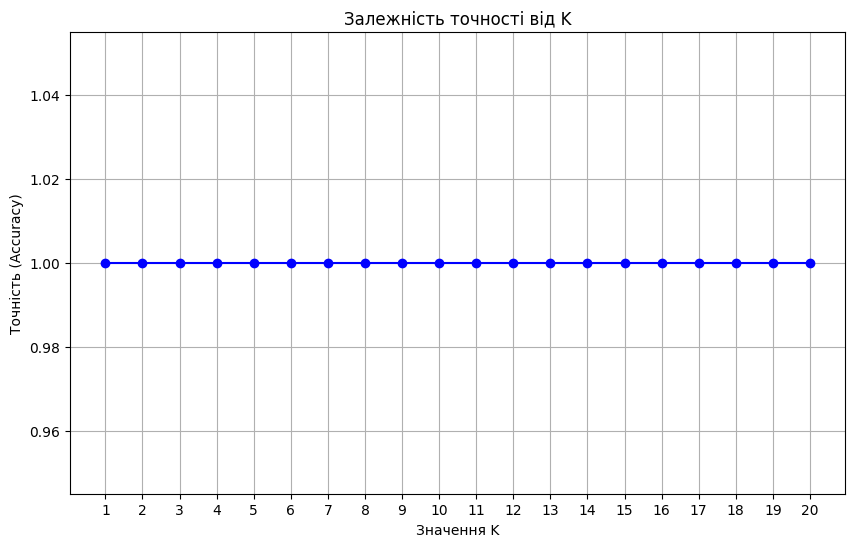

In [5]:
k_values = range(1, 21)
accuracies = []

best_k = -1
best_accuracy = 0
best_model = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    # Збереження найкращої моделі
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_model = knn

print(f"Найкраще значення K: {best_k} з точністю: {best_accuracy:.4f}")

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Залежність точності від K')
plt.xlabel('Значення K')
plt.ylabel('Точність (Accuracy)')
plt.grid(True)
plt.xticks(k_values)
plt.show()

Звіт класифікації:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



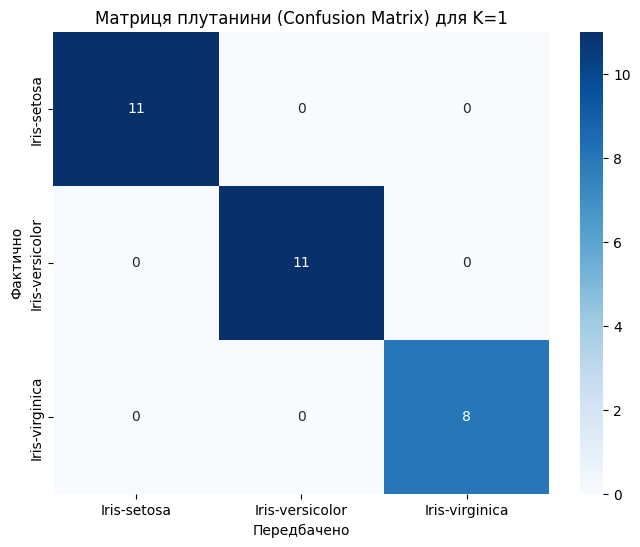

In [6]:
# Прогноз на найкращій моделі
y_pred_best = best_model.predict(X_test)

print("Звіт класифікації:")
print(classification_report(y_test, y_pred_best))

# Матриця плутанини
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, 
            yticklabels=best_model.classes_)
plt.title(f'Матриця плутанини (Confusion Matrix) для K={best_k}')
plt.xlabel('Передбачено')
plt.ylabel('Фактично')
plt.show()